In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from Ipython.display import display
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
%config InlineBackend.figure_format = 'retina'

In [3]:
path = "/Users/ZHHR/Desktop/python_codes/git_all/Kaggle/competitions/\
House Prices: Advanced Regression Techniques/"

In [7]:
df_train = pd.read_csv(f'{path}train.csv', index_col="Id")
df_test = pd.read_csv(f'{path}test.csv', index_col="Id")
print(df_train.shape)
print(df_test.shape)
df_train.head()

(1460, 80)
(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0.5,1,'After')

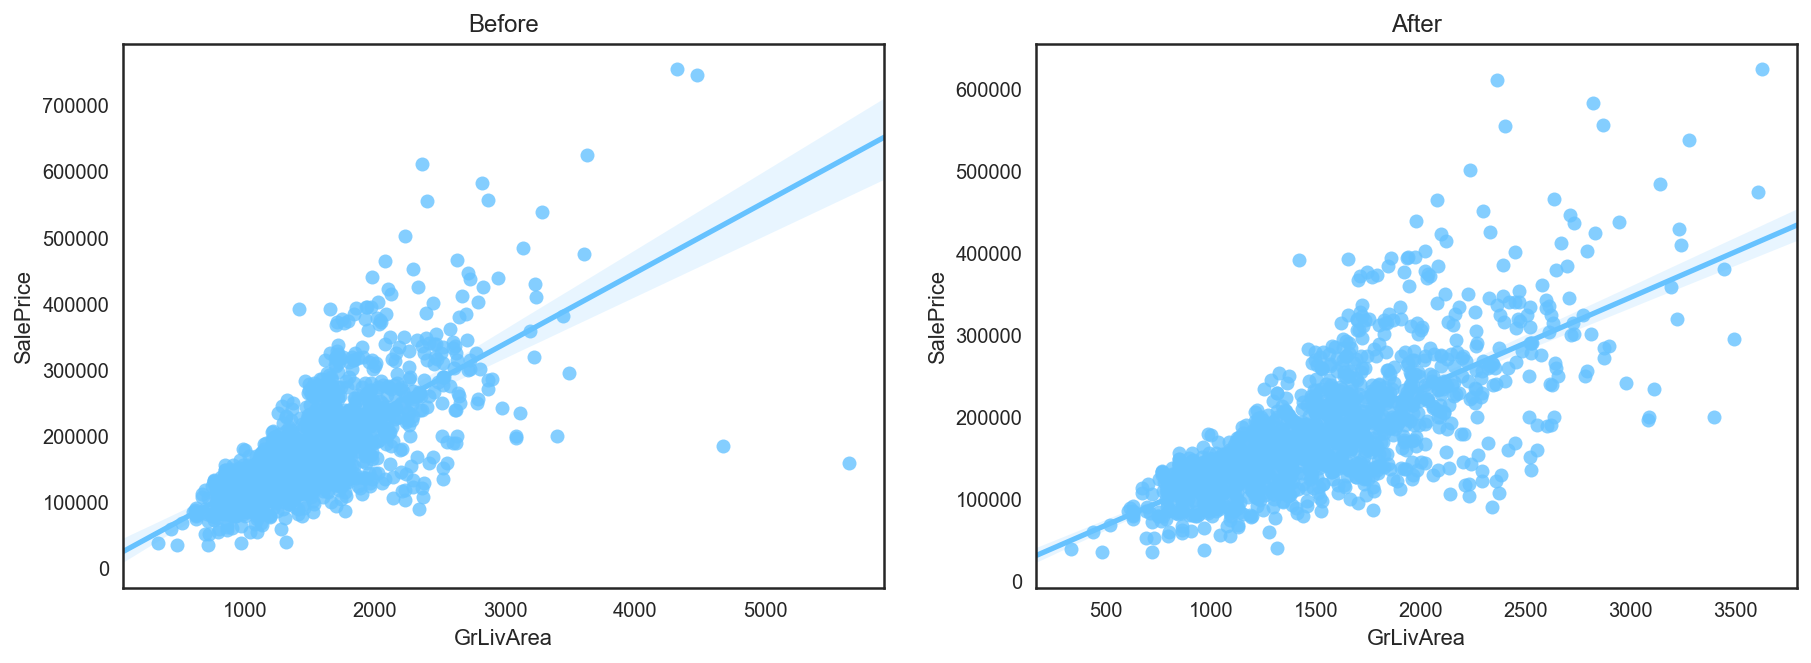

In [27]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.regplot(x=df_train.GrLivArea, y=df_train.SalePrice, fit_reg=True).set_title("Before")
plt.subplot(1, 2, 2)
expl = df_train[df_train.GrLivArea<=4000]
sns.regplot(x=expl.GrLivArea, y=expl.SalePrice, fit_reg=True).set_title("After")


In [30]:
df_train = df_train.drop(df_train[df_train.GrLivArea>4000].index)
ntrain, ntest = df_train.shape[0], df_test.shape[0]
ytrain = df_train.SalePrice.values
df_all = pd.concat([df_train, df_test])
df_all.reset_index(drop=True)
df_all.drop(['SalePrice'], axis=1, inplace=True)
df_all.shape

(2915, 79)